# Text Generation with Recurrent Neural Networks (RNNs)

In this assignment, you'll build upon your understanding of RNNs and Keras to develop a word-level text generation model.  Your goal is to train a model that learns the stylistic nuances of a chosen corpus and generates new, original text segments that echo the source material's essence.

**Datasets**

We've provided several intriguing text corpora to get you started:

*   Mark Twain
*   Charles Dickens
*   William Shakespeare

**Feel free to explore!**  If you have a particular passion for another author, genre, or a specific text, you're encouraged to use your own dataset of raw text.

In [34]:
'''
def download_file(url, file_path):
    import requests
    r = requests.get(url)
    with open(file_path, 'wb') as f:
        f.write(r.content)

def load_dataset(file_path, fraction=1.0):
    with open(file_path, 'r', encoding='utf-8') as f:
        raw_text = f.read()
    return raw_text[:int(fraction * len(raw_text))]

dataset = 'shakespeare.txt' # Other options are mark_twain.txt, charles_dickens.txt

download_file(f'https://github.com/UofT-DSI/deep_learning/tree/main/02_activities/assignments/downloaded_books/' + dataset, dataset)

# Load chosen dataset. NOTE: If Colab is running out of memory, change the `fraction` parameter to a value between 0 and 1 to load less data.
text = load_dataset(dataset, fraction=0.1)
'''
import tensorflow as tf
from tensorflow import keras

#For some reason the above code is not working for me but found this simple code below to upload the data.
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://github.com/UofT-DSI/deep_learning/tree/main/02_activities/assignments/downloaded_books/shakespeare.txt')
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')


# 1. Data Preparation (Complete or Incomplete)

Before we can begin training an RNN model, we need to prepare the dataset. This involves cleaning the text, tokenizing words, and creating sequences the model can be trained on.

## 1.1 Data Exploration

Print the first 1000 characters of the dataset. Report the dataset's size and the number of unique characters it contains.

In [35]:
# Take a look at the first 1000 characters in text
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [36]:
# The number of characters in the text is the size of the dataset
print(f'Length of text: {len(text)} characters')

Length of text: 1115394 characters


In [37]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')

65 unique characters


## 1.2 Text Pre-Processing

To prepare the dataset for training, we need to clean the text and create a numerical representation the model can interpret. Perform the following pre-processing steps:

*   Convert the entire text to lowercase.
*   Use the `Tokenizer` class from the `keras.preprocessing.text` module to tokenize the text. You should fit the tokenizer on the text and then convert the text to a sequence of numbers. You can use the `texts_to_sequences` method to do this.

**Note**:
* You'll need to specify an appropriate size for the vocabulary. The number of words in the list of most common words can serve as a guide - does it seem like a reasonable vocabulary size?
* Some of the words will be excluded from the vocabulary, as they don't appear often enough. It's important to provide a value for `oov_token` when creating the Tokenizer instance, so that these words can be represented as "unknown".

In [38]:
# Convert to lower case
text_lc = text.lower()

In [39]:

# Find the k most frequent words 
from collections import Counter 
  
# split() returns list of all the words in the string 
split_it = text_lc.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(750) 
  
print(most_occur) 

[('the', 6279), ('and', 5479), ('to', 4723), ('i', 4403), ('of', 3721), ('my', 3114), ('a', 2975), ('you', 2449), ('that', 2427), ('in', 2312), ('is', 1963), ('for', 1835), ('with', 1800), ('not', 1741), ('your', 1680), ('be', 1597), ('his', 1521), ('he', 1411), ('as', 1404), ('but', 1402), ('have', 1386), ('it', 1365), ('this', 1345), ('thou', 1297), ('me', 1118), ('thy', 1059), ('will', 948), ('what', 936), ('so', 897), ('by', 872), ('we', 840), ('shall', 808), ('if', 790), ('our', 786), ('all', 746), ('are', 738), ('him', 715), ('king', 686), ('do', 685), ('no', 682), ('her', 654), ('from', 621), ('good', 600), ('on', 572), ('or', 563), ('at', 550), ('which', 542), ('would', 517), ('they', 515), ('was', 497), ('how', 482), ('than', 478), ('their', 476), ('more', 459), ('she', 457), ('hath', 445), ('let', 437), ('am', 432), ("i'll", 425), ('thee', 422), ('when', 417), ('duke', 415), ('now', 398), ('then', 395), ('were', 391), ('make', 387), ('may', 374), ('upon', 370), ('one', 365), 

In [40]:

# Function to count  the number of unique words
# in the given text file.

def countUniqueWords(fileName):
    file = open(fileName, 'r')
    # Read file contents as string and convert to lowercase.
    read_file = file.read().lower()
    words_in_file = read_file.split()  
    # Creating a dictionary for counting number of occurrences.
    count_map = {}
    for i in words_in_file:
        if i in count_map:
            count_map[i] += 1  
        else:
            count_map[i] = 1
    count = 0
    # Traverse the dictionary and increment
    # the counter for every unique word.
    for i in count_map:
        if count_map[i] == 1:
            count += 1
    file.close()
    return count  # Return the count.


print('Number of unique words in the file are:', 
      countUniqueWords('shakespeare.txt'))

Number of unique words in the file are: 2960


In [41]:
from keras.preprocessing.text import Tokenizer

# Your code here
VOCAB_SIZE = 2960
OOV_TOKEN = "Unk"

# vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token=OOV_TOKEN, char_level=False)
tokenizer.fit_on_texts([text_lc])

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(f'Example of word_index: {list(word_index.items())[:]}')


Found 12633 unique tokens.
Example of word_index: [('Unk', 1), ('the', 2), ('and', 3), ('to', 4), ('i', 5), ('of', 6), ('you', 7), ('my', 8), ('a', 9), ('that', 10), ('in', 11), ('is', 12), ('not', 13), ('for', 14), ('with', 15), ('me', 16), ('it', 17), ('be', 18), ('your', 19), ('his', 20), ('but', 21), ('this', 22), ('he', 23), ('have', 24), ('as', 25), ('thou', 26), ('him', 27), ('so', 28), ('what', 29), ('thy', 30), ('will', 31), ('by', 32), ('no', 33), ('all', 34), ('king', 35), ('we', 36), ('shall', 37), ('her', 38), ('if', 39), ('our', 40), ('are', 41), ('do', 42), ('thee', 43), ('lord', 44), ('now', 45), ('on', 46), ('good', 47), ('from', 48), ('come', 49), ('sir', 50), ('or', 51), ('which', 52), ('more', 53), ('then', 54), ('at', 55), ('o', 56), ('would', 57), ('was', 58), ('they', 59), ('how', 60), ('well', 61), ('here', 62), ('she', 63), ('than', 64), ('their', 65), ('them', 66), ('duke', 67), ('am', 68), ('hath', 69), ('say', 70), ('let', 71), ('when', 72), ('one', 73), ("i

If everything worked, the following line should show you the first 10 words in the vocabulary:

In [42]:
try:
    print(list(tokenizer.word_index.items())[:10])
except AttributeError:
    print("Tokenizer has not been initialized. Possible issue: Complete the relevant section of the assignment to initialize it."
)


[('Unk', 1), ('the', 2), ('and', 3), ('to', 4), ('i', 5), ('of', 6), ('you', 7), ('my', 8), ('a', 9), ('that', 10)]


## 1.3 Sequence Generation

Now that the text has been tokenized, we need to create sequences the model can be trained on. There are two parts to this:

*   Use the `texts_to_sequences` method from the tokenizer to convert the text to a list of sequences of numbers.
*   Generate the training sequences. Each training sequence should contain `SEQ_LENGTH` token IDs from the text. The target token for each sequence should be the word that follows the sequence in the text.

In [43]:
# Generate the training sequences

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences_t = tokenizer.texts_to_sequences([text_lc])[0]
print(sequences_t)


[89, 270, 140, 36, 970, 144, 669, 128, 16, 103, 34, 103, 103, 89, 270, 7, 41, 34, 1269, 351, 4, 200, 64, 4, 1, 34, 1269, 1269, 89, 270, 89, 7, 92, 1142, 232, 12, 2275, 581, 4, 2, 306, 34, 36, 2556, 36, 2556, 89, 270, 71, 79, 503, 27, 3, 370, 24, 1341, 55, 40, 163, 2276, 643, 9, 1, 34, 33, 53, 2876, 884, 71, 17, 18, 165, 149, 149, 167, 270, 73, 220, 47, 613, 89, 270, 36, 41, 1, 174, 613, 2, 1896, 47, 29, 1270, 1, 46, 57, 1, 79, 39, 59, 57, 582, 79, 21, 2, 1, 336, 17, 77, 1897, 36, 259, 1012, 59, 1, 79, 1, 21, 59, 134, 36, 41, 100, 267, 2, 1, 10, 1, 79, 2, 2277, 6, 40, 1517, 12, 25, 88, 1, 4, 1, 65, 1, 40, 2877, 12, 9, 1342, 4, 66, 71, 79, 631, 22, 15, 40, 1, 251, 36, 655, 1, 14, 2, 425, 92, 5, 103, 22, 11, 1, 14, 2278, 13, 11, 1, 14, 631, 167, 270, 57, 7, 970, 1, 172, 1142, 232, 34, 172, 27, 89, 340, 9, 160, 971, 4, 2, 1, 167, 270, 1749, 7, 29, 1518, 23, 324, 165, 14, 20, 656, 89, 270, 160, 61, 3, 228, 18, 504, 4, 102, 27, 47, 560, 1, 21, 10, 23, 1, 244, 15, 147, 444, 167, 270, 183, 21,

In [44]:
vocab_size = len(tokenizer.word_index) + 1 #vocabulary size tokenized

SEQ_LENGTH = 20
sequences = []
next_words = []

# Create sequences of text
for i in range(0, len(sequences_t) - SEQ_LENGTH):
    sequences.append(sequences_t[i:i + SEQ_LENGTH])
    next_words.append(sequences_t[i + SEQ_LENGTH])

# Convert to numpy arrays
sequences_fin = np.array(sequences)
next_words = np.array(next_words)


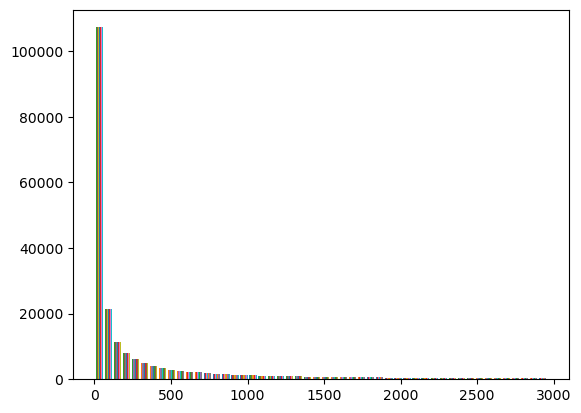

In [45]:
import matplotlib.pyplot as plt

plt.hist(sequences_fin, bins=50);

Assuming your sequences are stored in `X` and the corresponding targets in `y`, the following line should print the first training sequence and its target:

In [46]:
X = sequences_fin 
y = next_words 

In [47]:
if len(X) > 0 and len(y) > 0:
    print(f'Sequence: {X[0]}\nTarget: {y[0]}')
    print(f'Translated back to words: {[tokenizer.index_word[i] for i in X[0]]} -> {tokenizer.index_word[y[0]]}')
else:
    print("Training sequences have not been generated. Possible issue: Complete the relevant section of the assignment to initialize it.")


Sequence: [  89  270  140   36  970  144  669  128   16  103   34  103  103   89
  270    7   41   34 1269  351]
Target: 4
Translated back to words: ['first', 'citizen', 'before', 'we', 'proceed', 'any', 'further', 'hear', 'me', 'speak', 'all', 'speak', 'speak', 'first', 'citizen', 'you', 'are', 'all', 'resolved', 'rather'] -> to


And the following code will transform y into a one-hot encoded matrix, and split everything into training and validation sets:

In [48]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import numpy as np

# Ensure that tokenizer has been initialized
if tokenizer is not None:
    # Convert X and y to numpy arrays
    X = np.array(X)
    y = np.array(y)

    # One last thing: let's drop any examples where the target is the OOV token - we don't want our model to predict that (boring!)
    if OOV_TOKEN in tokenizer.word_index:
        mask = y != tokenizer.word_index[OOV_TOKEN]
        X = X[mask]
        y = y[mask]

    # One-hot encode the target token
    #y = to_categorical(y, num_classes=VOCAB_SIZE)
    # No need to one-hot target as I can use sparse_categorical_crossentropy as my loss function

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print(f'X_train shape: {X_train.shape}')
    print(f'y_train shape: {y_train.shape}')
else:
    print("Tokenizer has not been initialized. Please initialize it and load the vocabulary before continuing.")


X_train shape: (149594, 20)
y_train shape: (149594,)


# 2. Model Development (Complete or Incomplete)

With the dataset prepared, it's time to develop the RNN model. You'll need to define the architecture of the model, compile it, and prepare it for training.

## 2.1 Model Architecture

Define the architecture of your RNN model. You can design it however you like, but there are a few features that it's important to include:

*   An embedding layer that learns a dense representation of the input tokens. You'll need to specify the input dimension (the size of the vocabulary) and the output dimension (the size of the dense representation). Remember, you can look at the documentation [here](https://keras.io/api/layers/core_layers/embedding/).
*   At least one recurrent layer. We have learned how to use LSTM layers in class, but you can use other types of recurrent layers if you prefer. You can find the documentation [here](https://keras.io/api/layers/recurrent_layers/lstm/).
*   A dense layer with a softmax activation function. This layer will output a probability distribution over the vocabulary, so that the model can make predictions about the next token.

In [49]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten

EMBEDDING_DIM = 50
rnn_units = 256

model = Sequential([
    Embedding(vocab_size, EMBEDDING_DIM, input_length=SEQ_LENGTH, trainable=True), 
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),  
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),  
    LSTM(rnn_units, return_sequences=True),
    Flatten(),
    Dense(128, activation='relu'), 
    Dense(vocab_size, activation='softmax') 
])

# Check if the model has layers before trying to print the summary
if len(model.layers) > 0:
    model.summary()
else:
    print("No layers have been added to the model. Please complete the assignment by adding the required layers.")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 50)            631700    
                                                                 
 conv1d_4 (Conv1D)           (None, 16, 128)           32128     
                                                                 
 max_pooling1d_4 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 4, 128)            82048     
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 2, 128)            0         
 g1D)                                                            
                                                                 
 lstm_2 (LSTM)               (None, 2, 256)           

## 2.2 Model Compilation

Compile the model with an appropriate loss function and optimizer. You might also want to track additional metrics, such as accuracy.

Give a short explanation of your choice of loss function and optimizer:

_your explanation here_

In [50]:
from tensorflow.keras.optimizers.legacy import Adam

model.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

## 2.3 Model Training

Train the model on the training data you've prepared.

* Train your model for 5 epochs with a batch size of 128. Use the validation data for validation.
* Store the training history in a variable called `history`.

In [51]:
# Train the model
history = model.fit(
    X_train,          # Input sequences
    y_train,         # Target labels
    batch_size=128,      # Number of samples per batch
    epochs=5,          # Number of epochs
    validation_split=0.2  # Fraction of data for validation
)

Epoch 1/5
935/935 [==============================] - 22s 22ms/step - loss: 6.4310 - accuracy: 0.0321 - val_loss: 6.2993 - val_accuracy: 0.0328
Epoch 2/5
935/935 [==============================] - 21s 22ms/step - loss: 6.2610 - accuracy: 0.0322 - val_loss: 6.2368 - val_accuracy: 0.0250
Epoch 3/5
935/935 [==============================] - 21s 22ms/step - loss: 6.1353 - accuracy: 0.0353 - val_loss: 6.1157 - val_accuracy: 0.0392
Epoch 4/5
935/935 [==============================] - 21s 22ms/step - loss: 6.0128 - accuracy: 0.0413 - val_loss: 6.0741 - val_accuracy: 0.0426
Epoch 5/5
935/935 [==============================] - 21s 22ms/step - loss: 5.9084 - accuracy: 0.0465 - val_loss: 6.0552 - val_accuracy: 0.0484


Plot the training history to visualize the model's learning progress. Your plot should include the training and validation loss.

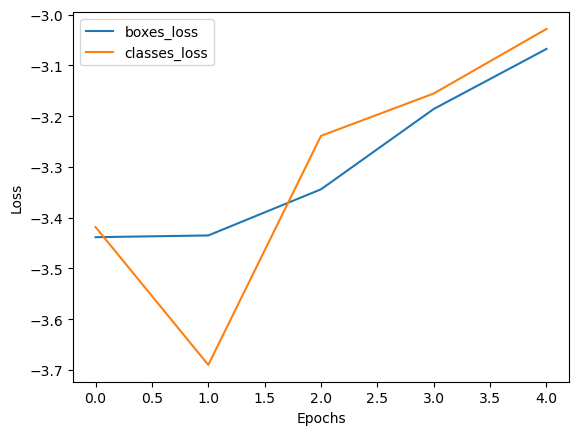

In [52]:
import matplotlib.pyplot as plt

plt.plot(np.log(history.history["accuracy"]), label="boxes_loss")
plt.plot(np.log(history.history["val_accuracy"]), label="classes_loss")
plt.legend(loc="upper left")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

# 3. Text Generation (Complete or Incomplete)

Write a method called `generate_text` that uses the trained model to generate new text. The method should take the following parameters:

*   `model`: The trained RNN model.
*   `tokenizer`: The tokenizer used to pre-process the text data.
*   `seed_text`: The seed text the model will use to generate new text.
*   `max_sequence_len`: The maximum length of the sequence used to generate new text.

The method should return the generated text.

An overview of the text generation process you should follow:

1. Tokenize the seed text using the tokenizer we built before.
2. Pad the sequences to the same length as the training sequences - you can use the `pad_sequences` method from the `keras.preprocessing.sequence` module, which is documented [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences).
3. Use the model to predict the next token in the sequence. Remember that the model will output a probability distribution over the vocabulary, so you'll need to use `np.argmax` to find the token with the highest probability.
4. Add the predicted token to the sequence and remove the first token.
5. Repeat steps 3-4 until you have generated the desired number of tokens.
6. Convert the generated token IDs back to words and return the combined result as a single string.

This is a challenging task, so don't hesitate to ask for help if you need it. It's okay if the generated text doesn't make much sense yet - we'll work on improving the model next.
As a bonus, you can make your method generate "gpt-style" by having it print out each word as it's generated, so you can see the text being generated in real time.

In [53]:
from keras.preprocessing.sequence import pad_sequences

def get_predicted_word(model, sequence):
    """
    Get the predicted word from the model.
    This helper function uses a concept we haven't covered in class yet: temperature.
    In essence, a little bit of randomness in what word we predict can make the text more interesting.
    """

    # Use the model to predict the next token in the sequence
    yhat = model.predict(sequence, verbose=0)

    # Get the index of the predicted word, according to the probabilities
    yhat = np.random.choice(range(VOCAB_SIZE), p=yhat.ravel())

    return yhat

def generate_text(model, tokenizer, seed_text, max_sequence_len):
    """
    Generate new text using the trained model.
    You can use the `get_predicted_word` helper function to help you with this.
    """
   
    generated_text = seed_text

    for _ in range(3):
        # Tokenize the seed text
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        
        # Pad sequences to match the required input length
        token_list = pad_sequences([token_list], maxlen=max_sequence_len, truncating='pre')

        # Predict the next word
        # I get an error when using the function get_predicted_word so using below code instead to get index of predicted next word
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs)

        # Convert index back to the word
        output_word = tokenizer.index_word.get(predicted_index, '')
        if not output_word:  # Stop if the word is invalid
            break

        # Append the word to the seed text and the generated text
        seed_text += ' ' + output_word
        generated_text += ' ' + output_word

        # Remove the first token from seed_text to shift the sequence
        seed_text = ' '.join(seed_text.split(' ')[1:])

    return generated_text
    

In [54]:
# Test the text generation function
generate_text(model, tokenizer, 'hamlet', SEQ_LENGTH)

'hamlet and and and'

It's likely that the text generated by your model doesn't make much sense yet. This is because the model hasn't been trained for very long, and the training dataset is relatively small. 

# 4. Model Refinement (Complete or Incomplete)

In this last section, you'll work on improving your model. There are many ways to do this, but here are a few ideas to get you started:

* Use pre-trained embeddings: the code below will help you to load pre-trained embeddings through Keras. 
* Experiment with different model architectures, including the number of layers, the number of units in each layer, and the use of dropout layers.
* Train your model for longer. You can also experiment with different batch sizes.

Implement and test out at least one of these ideas. If you have other ideas for improving the model, feel free to try them out as well.

In [55]:
#!wget https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
#!unzip glove.6B.zip
!curl -O https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  822M  100  822M    0     0  4239k      0  0:03:18  0:03:18 --:--:-- 4629k  0:03:29  0:00:01  0:03:28 4009kk      0  0:02:03  0:00:05  0:01:58 7148k6546k      0  0:02:08  0:00:06  0:02:02 7163k      0  0:02:27  0:00:16  0:02:11 5185k5  0:02:07 5191k0:00:31  0:02:03 5173k768k      0  0:02:56  0:00:56  0:02:00 2578k 4570k      0  0:03:04  0:01:02  0:02:02 2798k     0  0:03:05  0:01:10  0:01:55 5142k0  0:03:04  0:01:17  0:01:47 4372k  0  0:03:09  0:01:27  0:01:42 3520k 0:03:14  0:01:38  0:01:36 3030k     0  0:03:19  0:01:43  0:01:36 1927k2k      0  0:03:21  0:01:57  0:01:24 5716k2k      0  0:03:19  0:02:03  0:01:16 5210k264k      0  0:03:17  0:02:09  0:01:08 5117k9k      0  0:03:16  0:02:16  0:01:00 4673k78k      0  0:03:16  0:02:20  0:00:56 3819k  0:03:23  0:02:57  0:00:26 3913k19  0:03:14  0:00:05 4861k
Archive:  glove.6B.zip
r

In [56]:
# Load the pre-trained embeddings
embeddings_index = {}
try:
    with open('glove.6B.100d.txt', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    print(f'Found {len(embeddings_index)} word vectors.')
except FileNotFoundError:
    print("'glove.6B.100d.txt' File not found. Please make sure you have ran the previous cell.")

Found 400000 word vectors.


In [57]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    # Create an embedding matrix
    embedding_matrix = np.zeros((VOCAB_SIZE, 100))
    for word, i in tokenizer.word_index.items():
        if i < VOCAB_SIZE:
            embedding_vector = embeddings_index.get(word)
            if embedding_vector is not None:
                embedding_matrix[i] = embedding_vector

In [58]:
# Check if VOCAB_SIZE is set
if VOCAB_SIZE is None:
    print("You need to complete the previous parts of your assignment in order for this to work.")
else:
    embedding_layer = Embedding(
        VOCAB_SIZE, 100, weights=[embedding_matrix], input_length=SEQ_LENGTH, trainable=False
    )

In [59]:
# Define a new model and train it
from tensorflow.keras.layers import Dropout


model2 = Sequential([
    embedding_layer,
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),  # Optional pooling layer
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    Dropout(0.2), 
    LSTM(256, return_sequences=True),
    Dropout(0.2), 
    GlobalAveragePooling1D(),
    Dense(128, activation='relu'),
    Dense(len(tokenizer.word_index) + 1, activation='softmax') 
])


In [60]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 20, 100)           296000    
                                                                 
 conv1d_6 (Conv1D)           (None, 16, 128)           64128     
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 4, 128)            82048     
                                                                 
 dropout (Dropout)           (None, 4, 128)            0         
                                                                 
 lstm_3 (LSTM)               (None, 4, 256)            394240    
                                                      

In [61]:
model2.compile(
    loss='sparse_categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'])

In [62]:
# Train the model
history = model2.fit(
    X_train,          # Input sequences
    y_train,         # Target labels
    batch_size=250,      # Number of samples per batch
    epochs=15,          # Number of epochs
    validation_split=0.2  # Fraction of data for validation
)

Epoch 1/15
479/479 [==============================] - 22s 45ms/step - loss: 6.4191 - accuracy: 0.0319 - val_loss: 6.3085 - val_accuracy: 0.0328
Epoch 2/15
479/479 [==============================] - 21s 44ms/step - loss: 6.2876 - accuracy: 0.0327 - val_loss: 6.3194 - val_accuracy: 0.0328
Epoch 3/15
479/479 [==============================] - 21s 44ms/step - loss: 6.2823 - accuracy: 0.0328 - val_loss: 6.2972 - val_accuracy: 0.0328
Epoch 4/15
479/479 [==============================] - 21s 45ms/step - loss: 6.2744 - accuracy: 0.0323 - val_loss: 6.2894 - val_accuracy: 0.0296
Epoch 5/15
479/479 [==============================] - 23s 48ms/step - loss: 6.2730 - accuracy: 0.0327 - val_loss: 6.2936 - val_accuracy: 0.0328
Epoch 6/15
479/479 [==============================] - 21s 44ms/step - loss: 6.2693 - accuracy: 0.0328 - val_loss: 6.2845 - val_accuracy: 0.0328
Epoch 7/15
479/479 [==============================] - 21s 44ms/step - loss: 6.2690 - accuracy: 0.0328 - val_loss: 6.2807 - val_accuracy:

In [64]:
generate_text(model2, tokenizer, 'cat', SEQ_LENGTH)

'cat the the the'

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨**Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)**🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.